K-Means Clustering Algorithm

Using the Iris dataset which can be found which is actually provided within the sklearn library.

K-Means is an unsupervised machine learning algorithm that groups data into ***k*** number of clusters. The number of clusters is user defined and the algorithm will attempt to group the data even if this number is not optimal for the specific case.

This is why the ***Elbow Method*** was developed. It is a very popular technique which helps its users make a decision on how many clusters to use for the K-Means model. The idea is to run K-Means clustering for a range of clusters *k* (lets say from 1 to 10) and for each value, we are calculating the sum of squared distances from each point to its assigned center(distortions).

In [2]:
# Import relevant libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import datasets

In [3]:
pwd = os.getcwd()

In [4]:
df = pd.read_csv(pwd + '\Data\iris.csv') #reading the csv and changing species values to numberic values.
df = df.drop(columns = ['SepalWidthCm', 'PetalLengthCm'])
for x in df.index:
    if df.loc[x, "Species"] == "Iris-setosa":
        df.at[x, "Species"] = 1
    elif df.loc[x, "Species"] == "Iris-versicolor":
        df.at[x, "Species"] = 2
    else:
        df.at[x, "Species"] = 3
df.head()

,SepalLengthCm,PetalWidthCm,Species
0,5.1,0.2,1
1,4.9,0.2,1
2,4.7,0.2,1
3,4.6,0.2,1
4,5.0,0.2,1


Running K-Means with a range of k and collecting distortions into a list

In [5]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

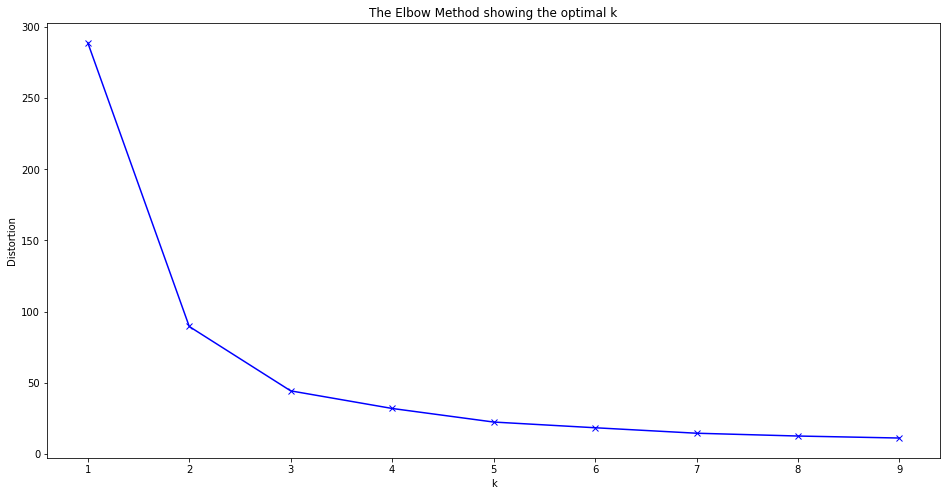

In [6]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The "elbow" is the number 3 because that is when the slope reaches the 'elbow' point. Which means n_clusters=3 is optimal for this case. Now we can run a K-Means using number 3 as the value for n_clusters

#### K-Means vs Actual for n_clusters=3

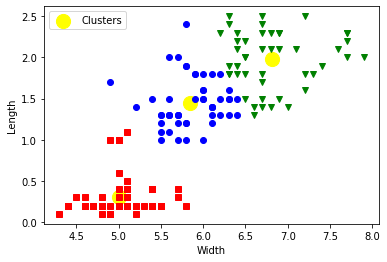

In [7]:
x = pd.array(df['SepalLengthCm'])
y = pd.array(df['PetalWidthCm'])
X = np.array(list(zip(x, y)))

colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']
plt.ylabel('Length')

kmeans = KMeans(n_clusters=3).fit(X)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Clusters')

for i, l in enumerate(kmeans.labels_):
    plt.plot(x[i], y[i], color=colors[l], marker=markers[l])
plt.xlabel('Width')
plt.legend()
plt.show()